# 🎨 3W Dataset Visualization Techniques

This notebook demonstrates advanced visualization techniques for the 3W oil well dataset using dimensionality reduction methods and statistical analysis.

**Key Features:**
- **raw vizualizzation**: vizualizar samples of each chosen class
- **t-SNE & UMAP**: Dimensionality reduction for pattern discovery with parameter optimization

**Prerequisites:**
- Run `1_data_treatment.ipynb` first to generate windowed time series data
- Ensure processed data is saved in pickle format for optimal performance

In [1]:
# Setup Environment and Imports
import time
import sys
import os

start_time = time.time()

print("🎨 Loading 3W Dataset for Visualization Analysis")
print("=" * 60)

# Add src to path and import modules
sys.path.append("src")

try:
    print("📦 Importing modules...", end=" ", flush=True)
    from src.data_persistence import DataPersistence
    from src.visualization import DataVisualizer, DimensionalityReductionVisualizer
    from src import config
    import pandas as pd
    import numpy as np
    print("✅")
    
    # Validate configuration
    print("⚙️ Validating configuration...", end=" ", flush=True)
    if hasattr(config, 'validate_config'):
        warnings = config.validate_config()
        if warnings:
            print("⚠️")
            for warning in warnings:
                print(f"     • {warning}")
        else:
            print("✅")
    else:
        print("✅")
    
    print("🔧 Initializing components...", end=" ", flush=True)
    persistence = DataPersistence(base_dir=config.PROCESSED_DATA_DIR, verbose=False)
    visualizer = DataVisualizer()
    dim_reducer = DimensionalityReductionVisualizer()
    print("✅")

    print(f"📁 Configuration Summary:")
    print(f"   • Save format: {config.SAVE_FORMAT}")
    print(f"   • Data directory: {config.PROCESSED_DATA_DIR}")

except Exception as e:
    print(f"❌ Setup failed: {e}")
    raise

🎨 Loading 3W Dataset for Visualization Analysis
📦 Importing modules... ✅
⚙️ Validating configuration... ✅
🔧 Initializing components... ✅
📁 Configuration Summary:
   • Save format: pickle
   • Data directory: processed_data
✅
⚙️ Validating configuration... ✅
🔧 Initializing components... ✅
📁 Configuration Summary:
   • Save format: pickle
   • Data directory: processed_data


In [2]:
# Load Windowed Data
try:
    print("📊 Loading windowed test data...")
    load_start = time.time()
    
    # Load data from first available fold using the existing visualizer
    test_dfs, test_classes, metadata = dim_reducer.load_windowed_data(persistence, config)
    
    load_time = time.time() - load_start
    print(f"✅ Data loaded successfully!")
    print(f"   • Format: {metadata['format']}")
    print(f"   • Fold: {metadata['fold_number']}")
    print(f"   • Windows: {metadata['windows_count']}")
    print(f"   • Load time: {load_time:.3f}s")
    
    # Quick data validation
    if test_dfs and len(test_dfs) > 0:
        sample_window = test_dfs[0]
        sample_class = test_classes[0] if test_classes else "Unknown"
        
        print(f"\n🪟 Sample Window Analysis:")
        print(f"   • Shape: {sample_window.shape}")
        print(f"   • Class: {sample_class}")
        print(f"   • Columns: {list(sample_window.columns)}")
        
        total_time = time.time() - start_time
        print(f"\n⚡ Total setup time: {total_time:.3f}s")
        print(f"🎯 Ready for visualization analysis!")
    else:
        print("⚠️ Warning: No test windows found")

except Exception as e:
    print(f"❌ Data loading failed: {e}")
    print("💡 Troubleshooting:")
    print("   • Ensure '1_data_treatment.ipynb' completed successfully")
    print("   • Check if processed_data directory exists")
    
    test_dfs, test_classes = None, None
    import traceback
    traceback.print_exc()

📊 Loading windowed test data...
📊 Loading windowed data...
   • Windowed directory: processed_data\cv_splits\windowed
   • Loading from fold_1
   ✅ Loaded 10217 windows from fold 1
✅ Data loaded successfully!
   • Format: pickle
   • Fold: 1
   • Windows: 10217
   • Load time: 0.832s

🪟 Sample Window Analysis:
   • Shape: (300, 4)
   • Class: 0
   • Columns: ['P-PDG_scaled', 'P-TPT_scaled', 'T-TPT_scaled', 'class']

⚡ Total setup time: 4.213s
🎯 Ready for visualization analysis!
   ✅ Loaded 10217 windows from fold 1
✅ Data loaded successfully!
   • Format: pickle
   • Fold: 1
   • Windows: 10217
   • Load time: 0.832s

🪟 Sample Window Analysis:
   • Shape: (300, 4)
   • Class: 0
   • Columns: ['P-PDG_scaled', 'P-TPT_scaled', 'T-TPT_scaled', 'class']

⚡ Total setup time: 4.213s
🎯 Ready for visualization analysis!


🎨 Raw Sensor Data Visualization
🏷️ Processing class labels...
🏷️ Original class distribution: {np.int16(0): np.int64(5025), np.int16(1): np.int64(340), np.int16(2): np.int64(7), np.int16(3): np.int64(242), np.int16(4): np.int64(592), np.int16(5): np.int64(2), np.int16(6): np.int64(9), np.int16(7): np.int64(34), np.int16(8): np.int64(62), np.int16(101): np.int64(865), np.int16(102): np.int64(35), np.int16(105): np.int64(57), np.int16(106): np.int64(4), np.int16(107): np.int64(1712), np.int16(108): np.int64(1142), np.int16(109): np.int64(89)}
🔄 Mapped 3904 transient classes
🏷️ Mapped class distribution: {np.int64(0): np.int64(5025), np.int64(1): np.int64(1205), np.int64(2): np.int64(42), np.int64(3): np.int64(242), np.int64(4): np.int64(592), np.int64(5): np.int64(59), np.int64(6): np.int64(13), np.int64(7): np.int64(1746), np.int64(8): np.int64(1204), np.int64(9): np.int64(89)}
📊 Creating Raw Sensor Data Visualizations
📈 Visualizing 5 samples for each of 10 classes

🎯 Class 0:
   📊 Show

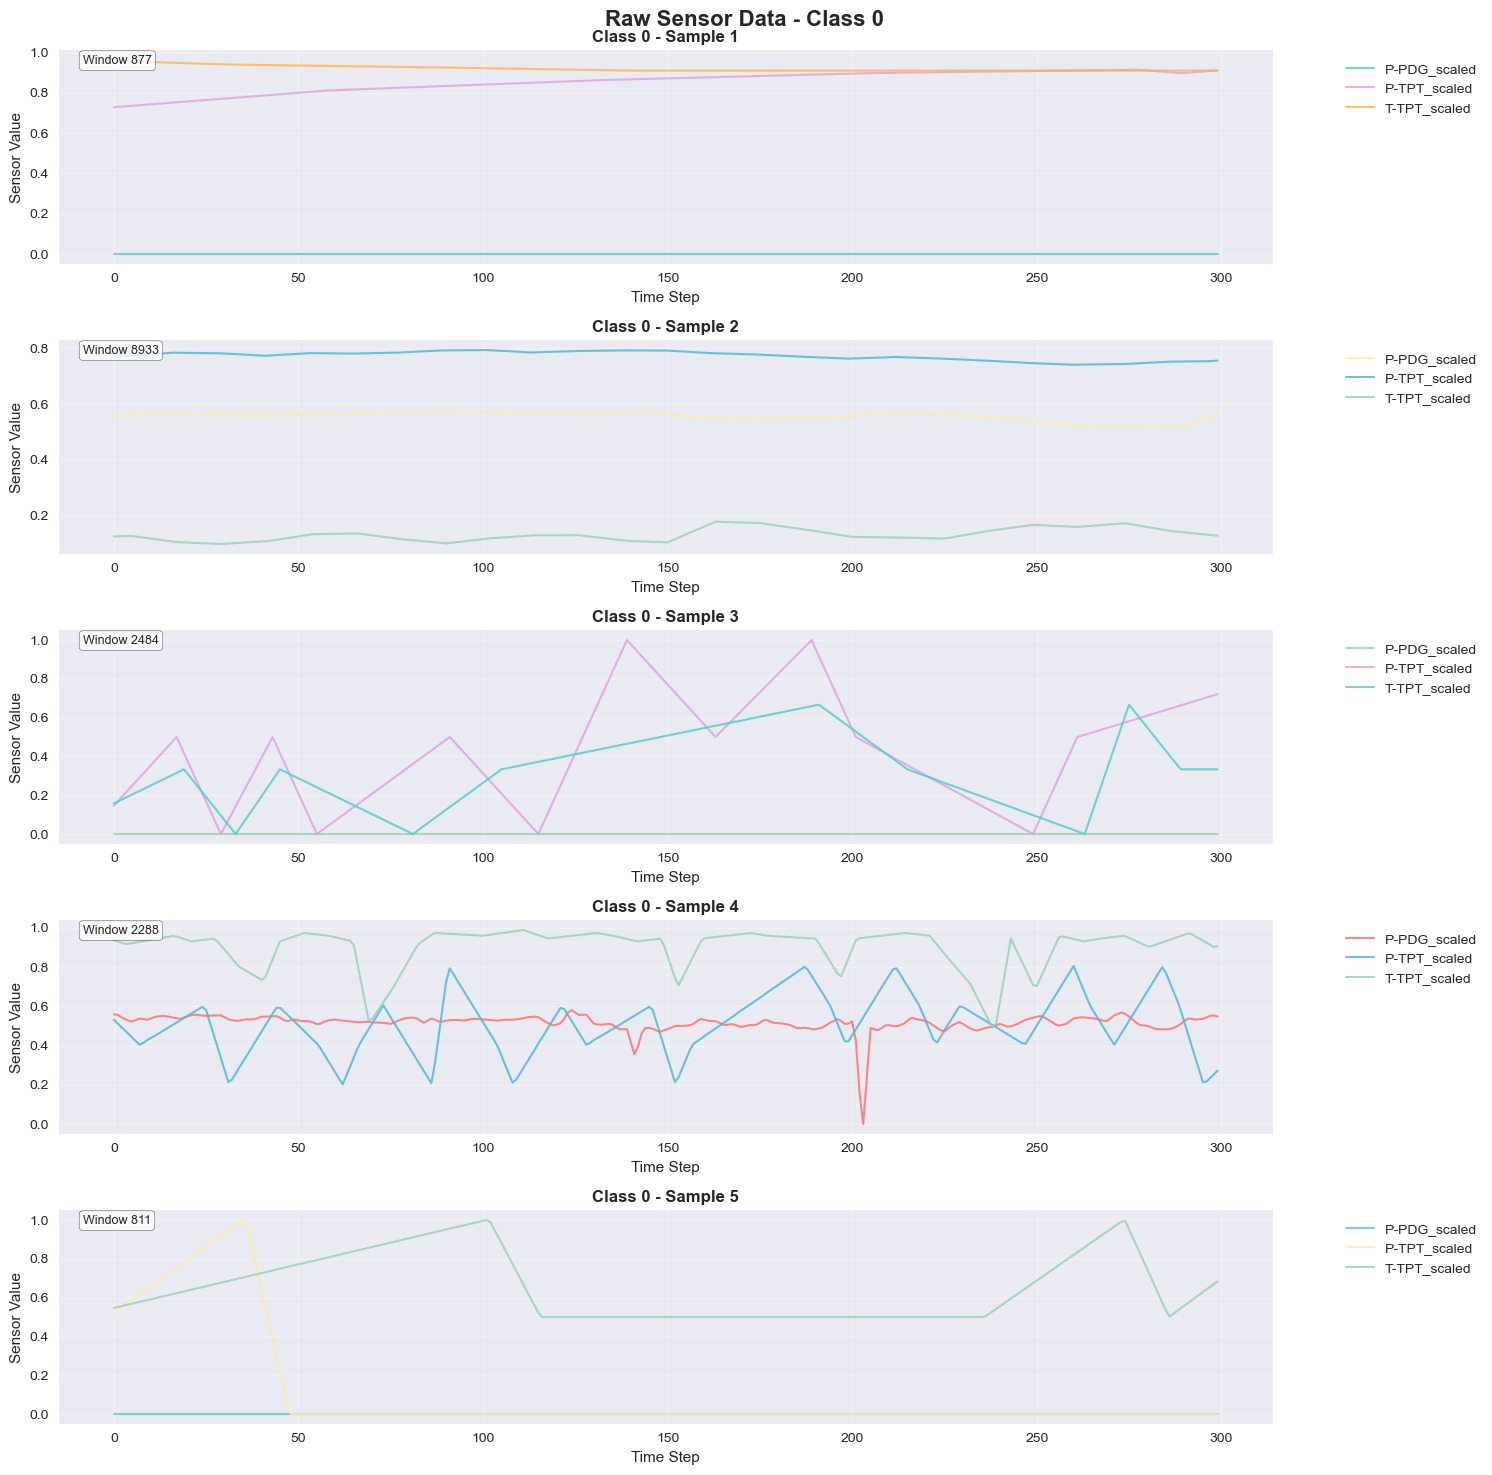

   ✅ Displayed 5 samples for class 0

🎯 Class 1:
   📊 Showing 5 samples (out of 1205 available)


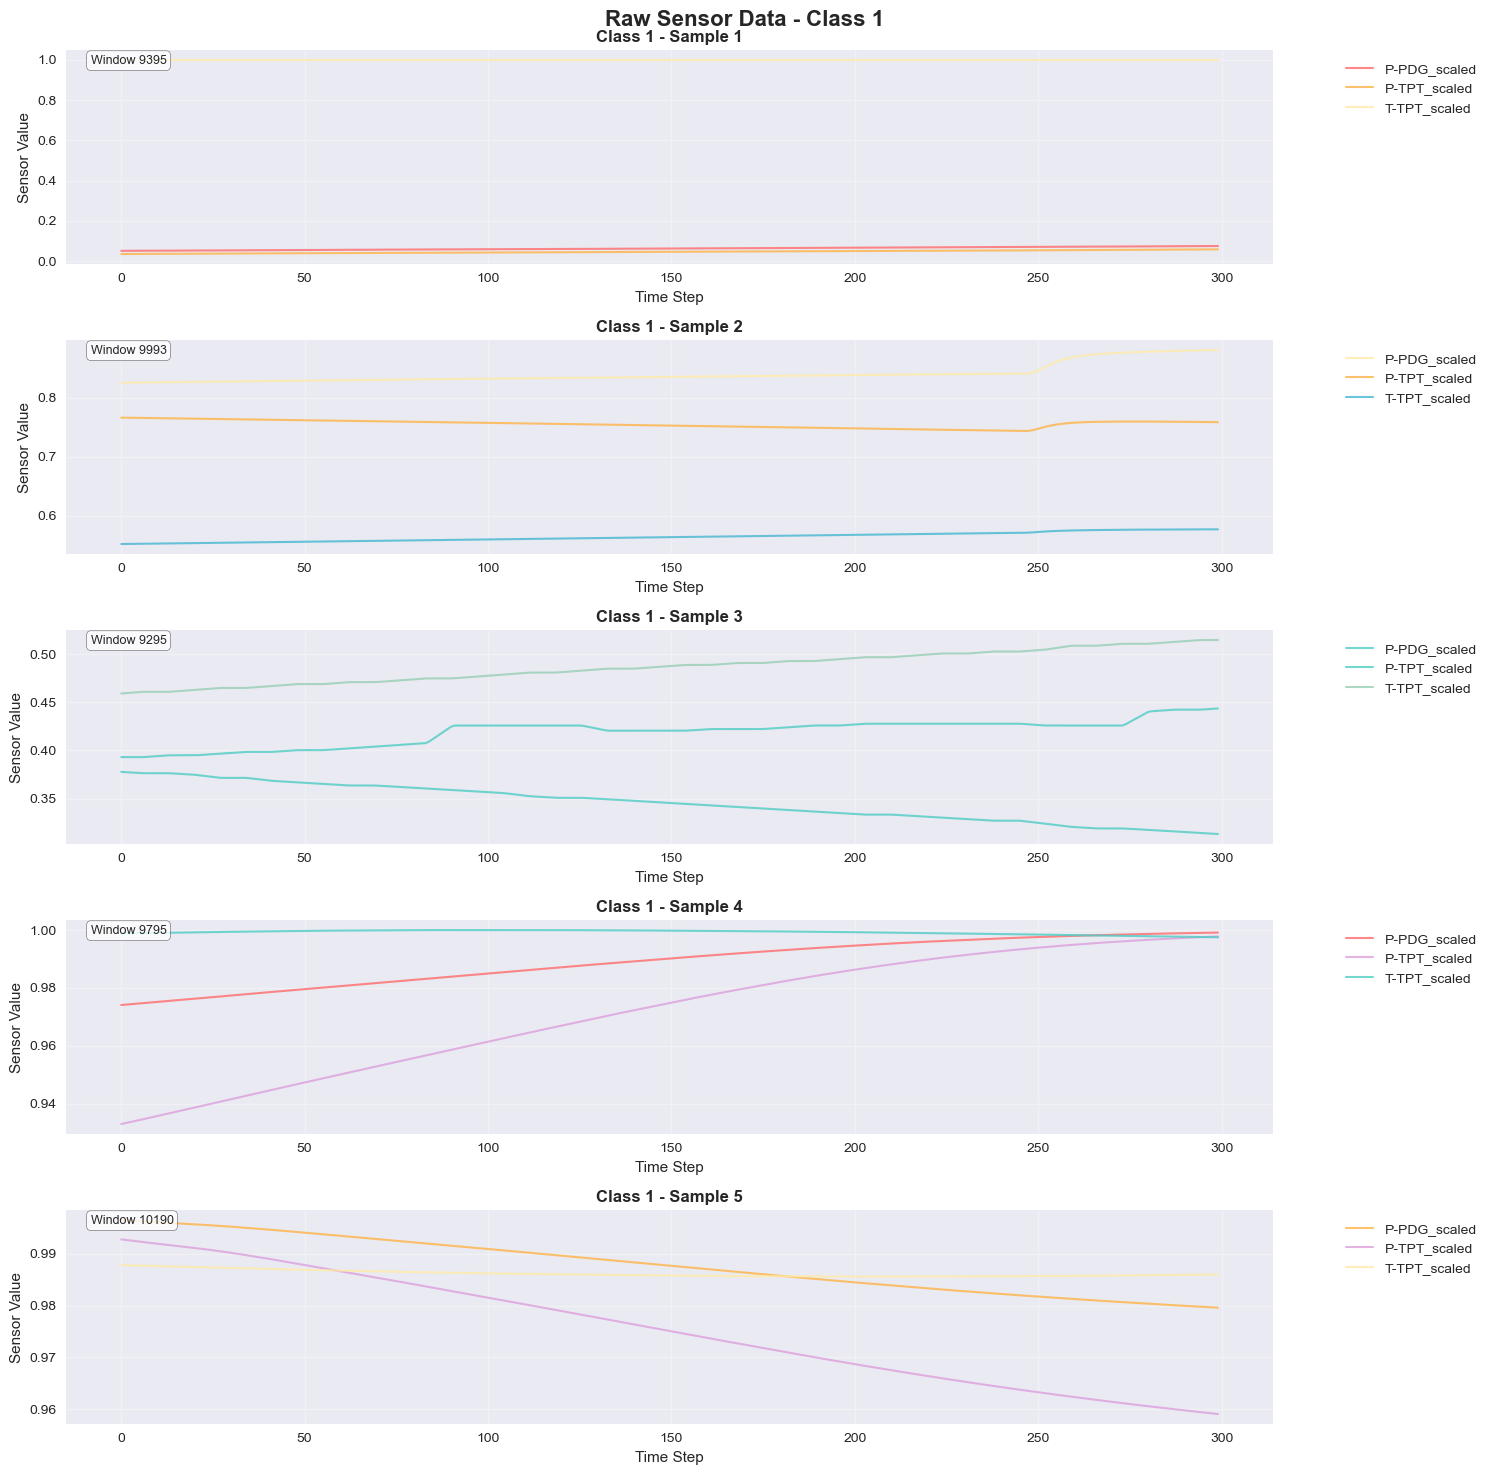

   ✅ Displayed 5 samples for class 1

🎯 Class 2:
   📊 Showing 5 samples (out of 42 available)


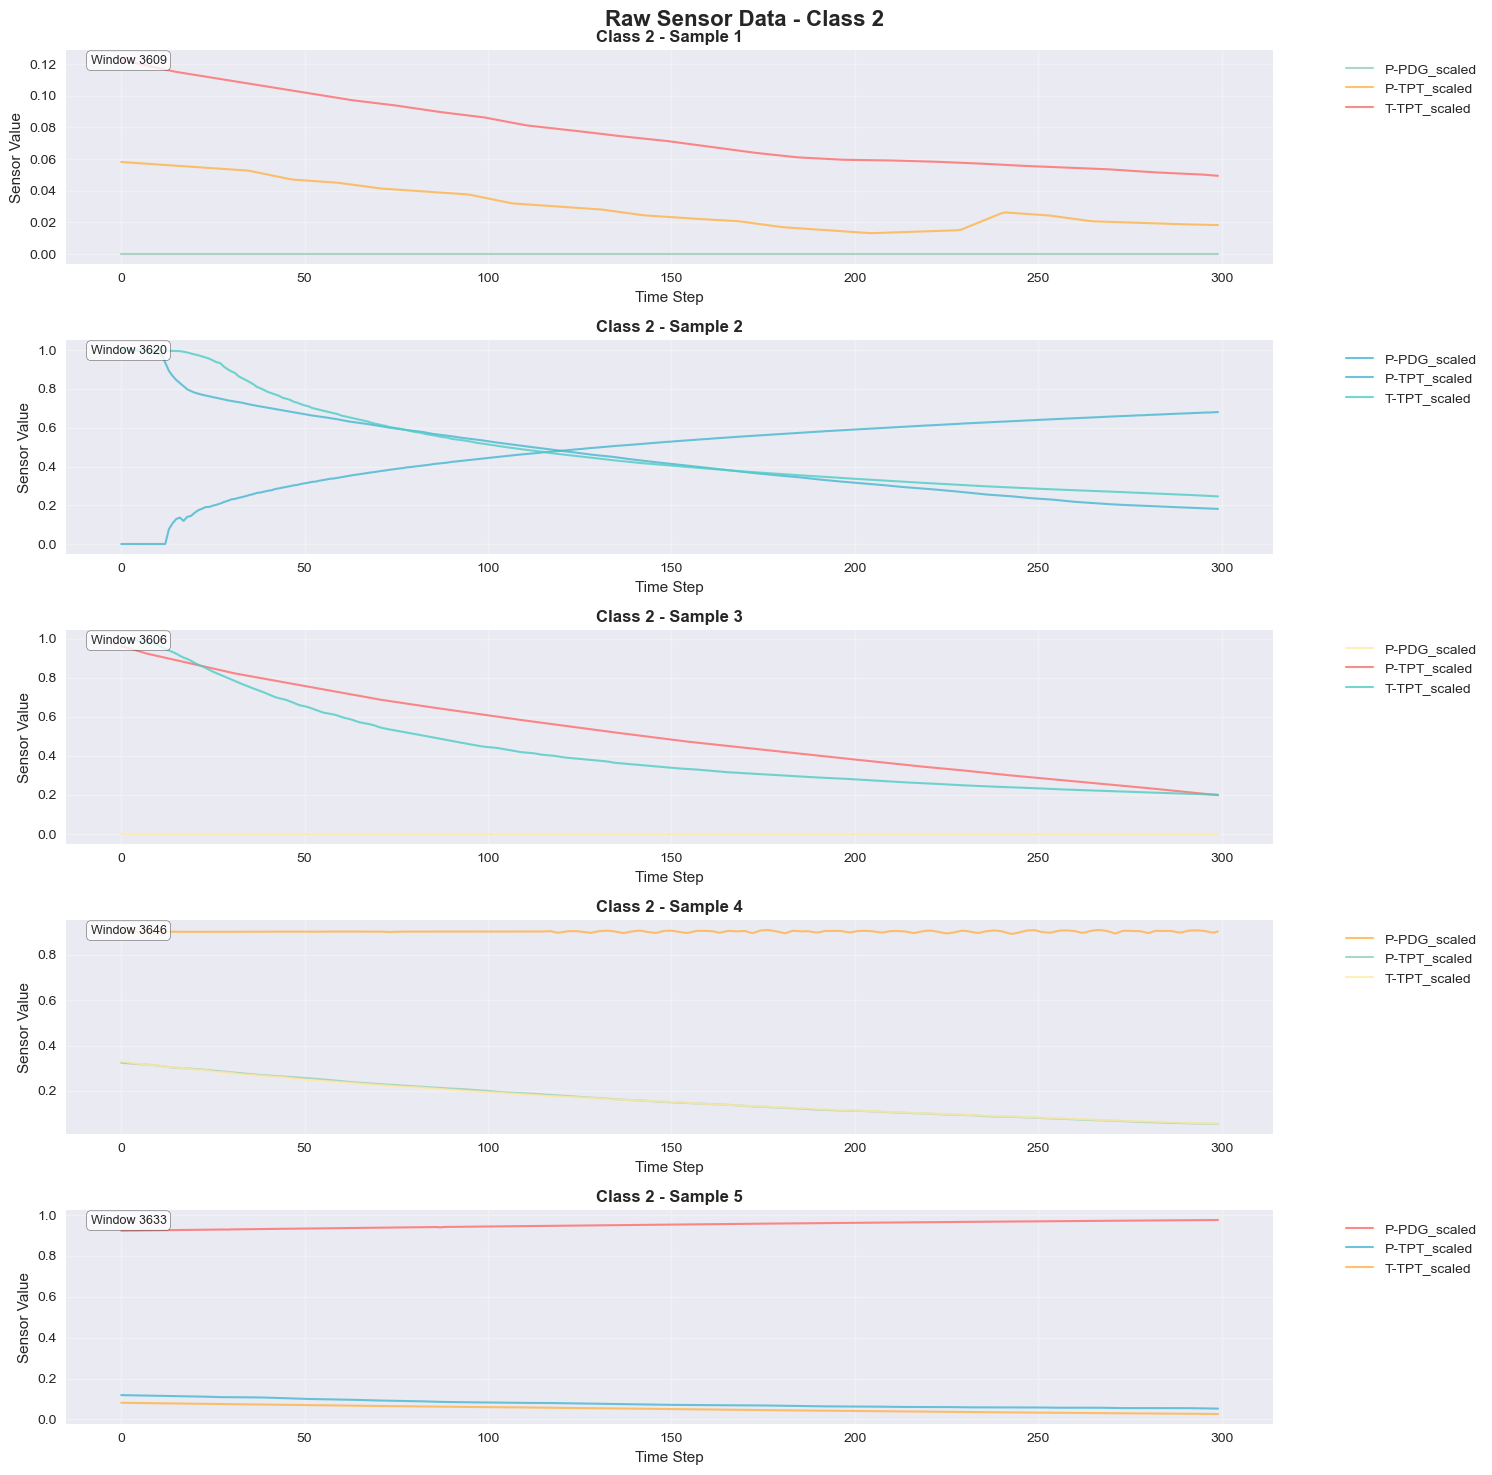

   ✅ Displayed 5 samples for class 2

🎯 Class 3:
   📊 Showing 5 samples (out of 242 available)


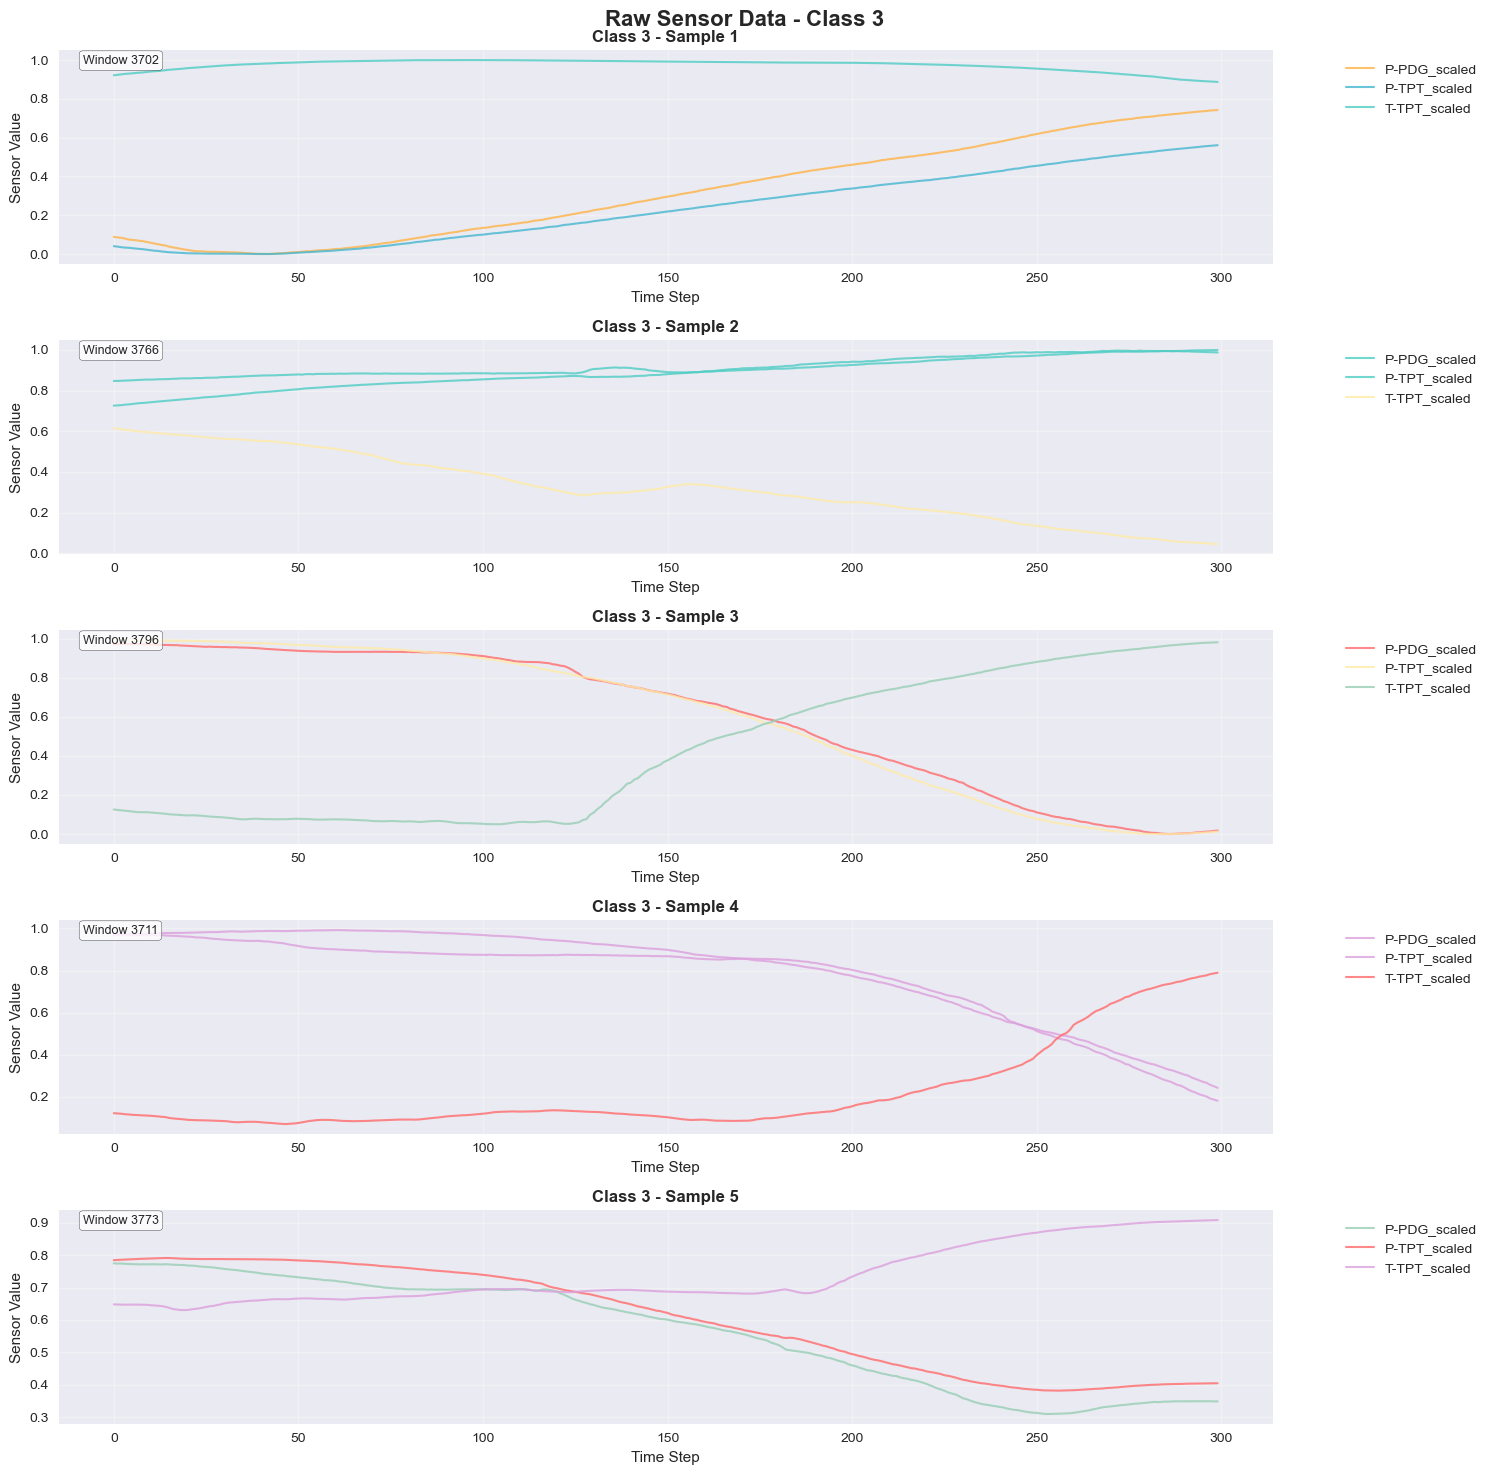

   ✅ Displayed 5 samples for class 3

🎯 Class 4:
   📊 Showing 5 samples (out of 592 available)


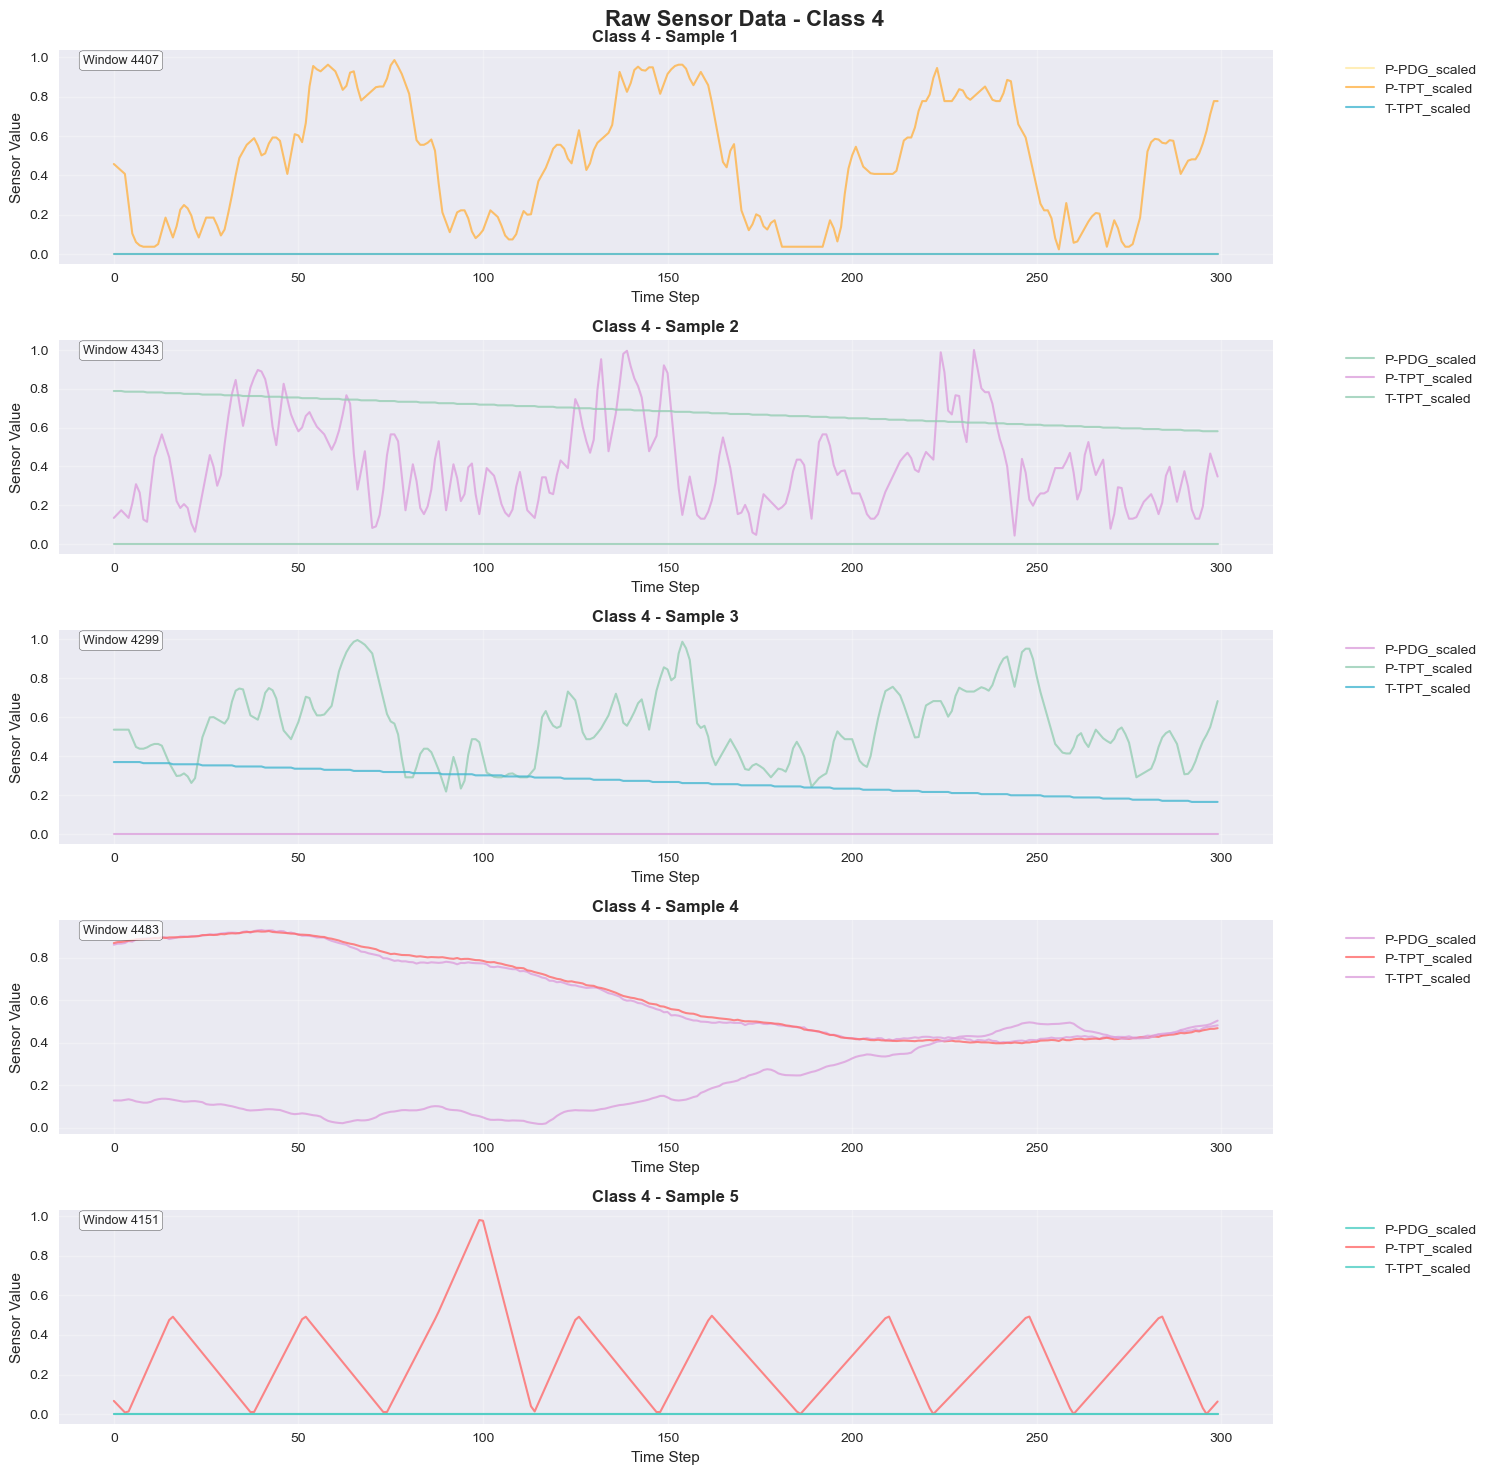

   ✅ Displayed 5 samples for class 4

🎯 Class 5:
   📊 Showing 5 samples (out of 59 available)


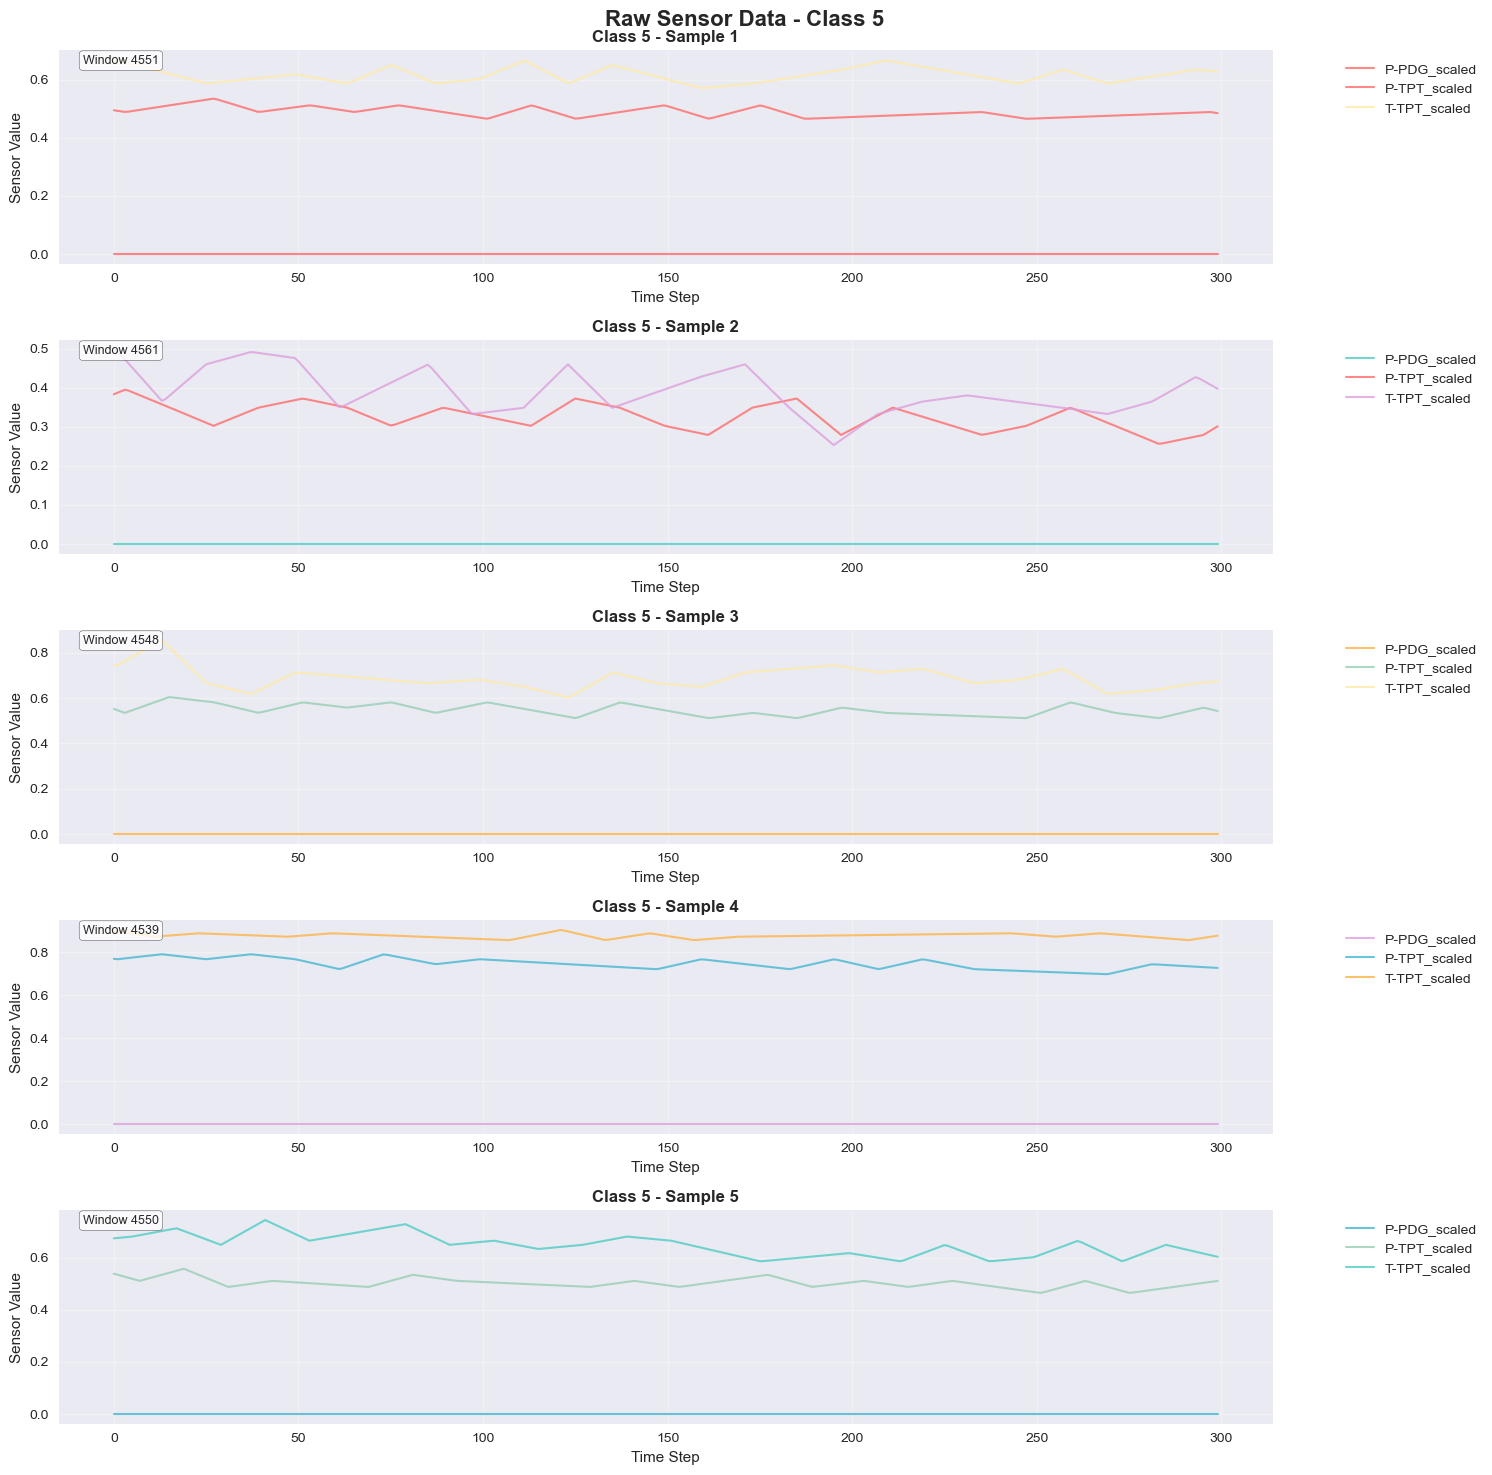

   ✅ Displayed 5 samples for class 5

🎯 Class 6:
   📊 Showing 5 samples (out of 13 available)


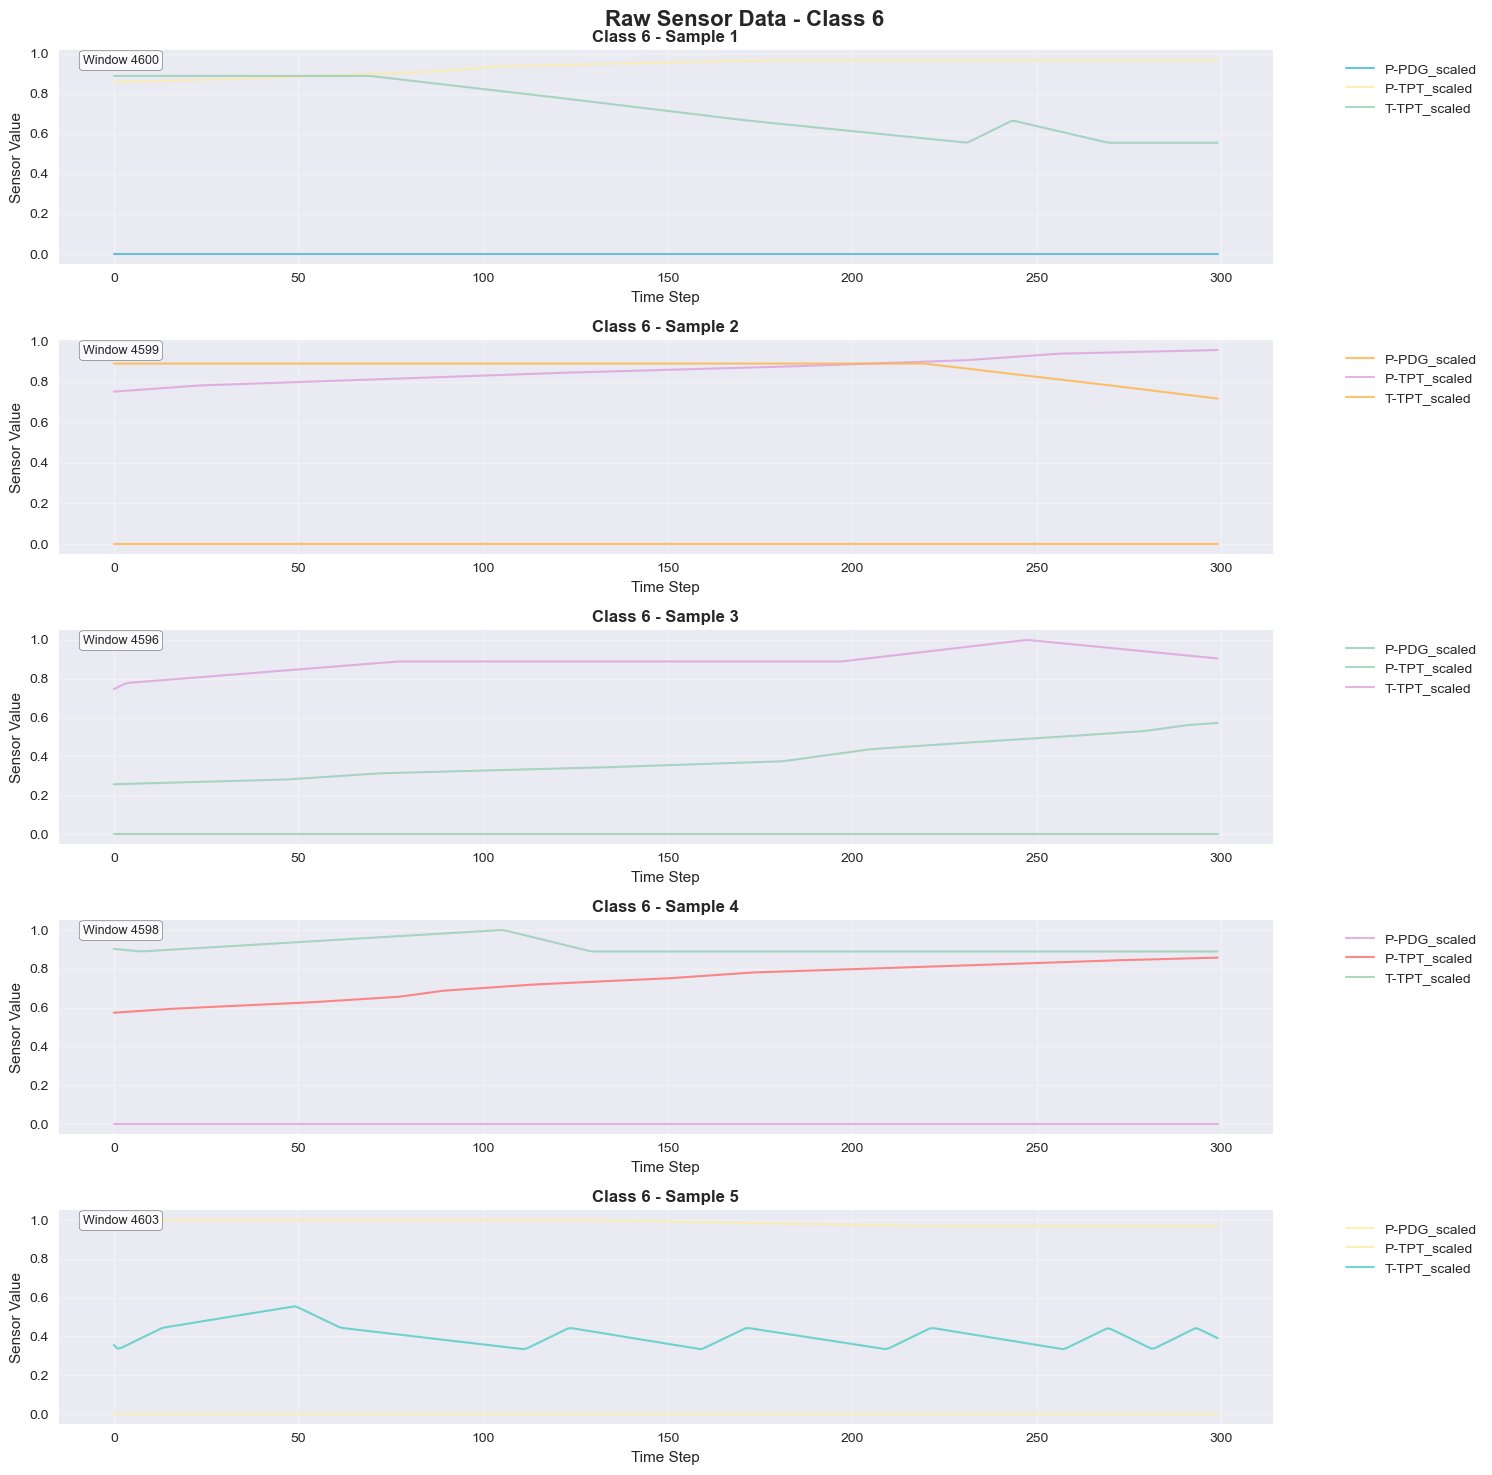

   ✅ Displayed 5 samples for class 6

🎯 Class 7:
   📊 Showing 5 samples (out of 1746 available)


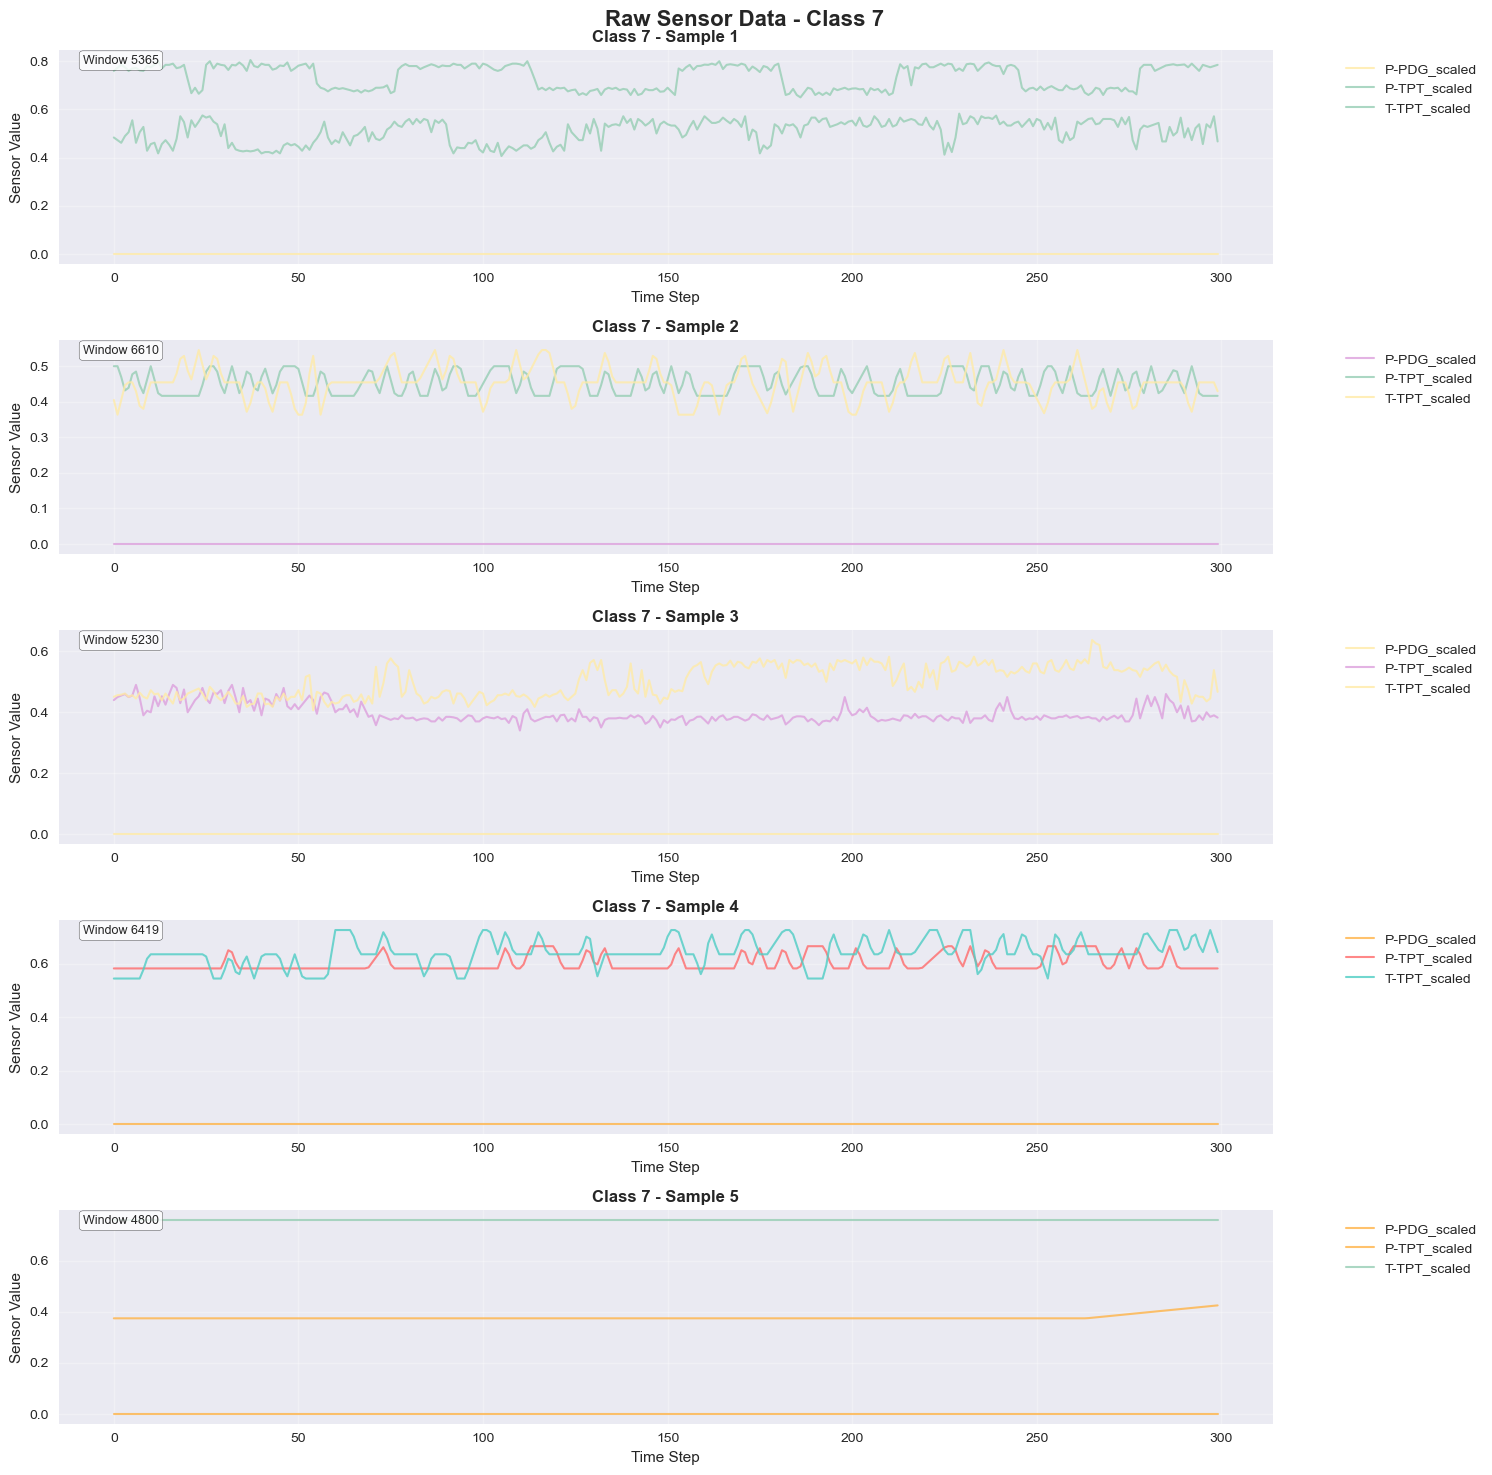

   ✅ Displayed 5 samples for class 7

🎯 Class 8:
   📊 Showing 5 samples (out of 1204 available)


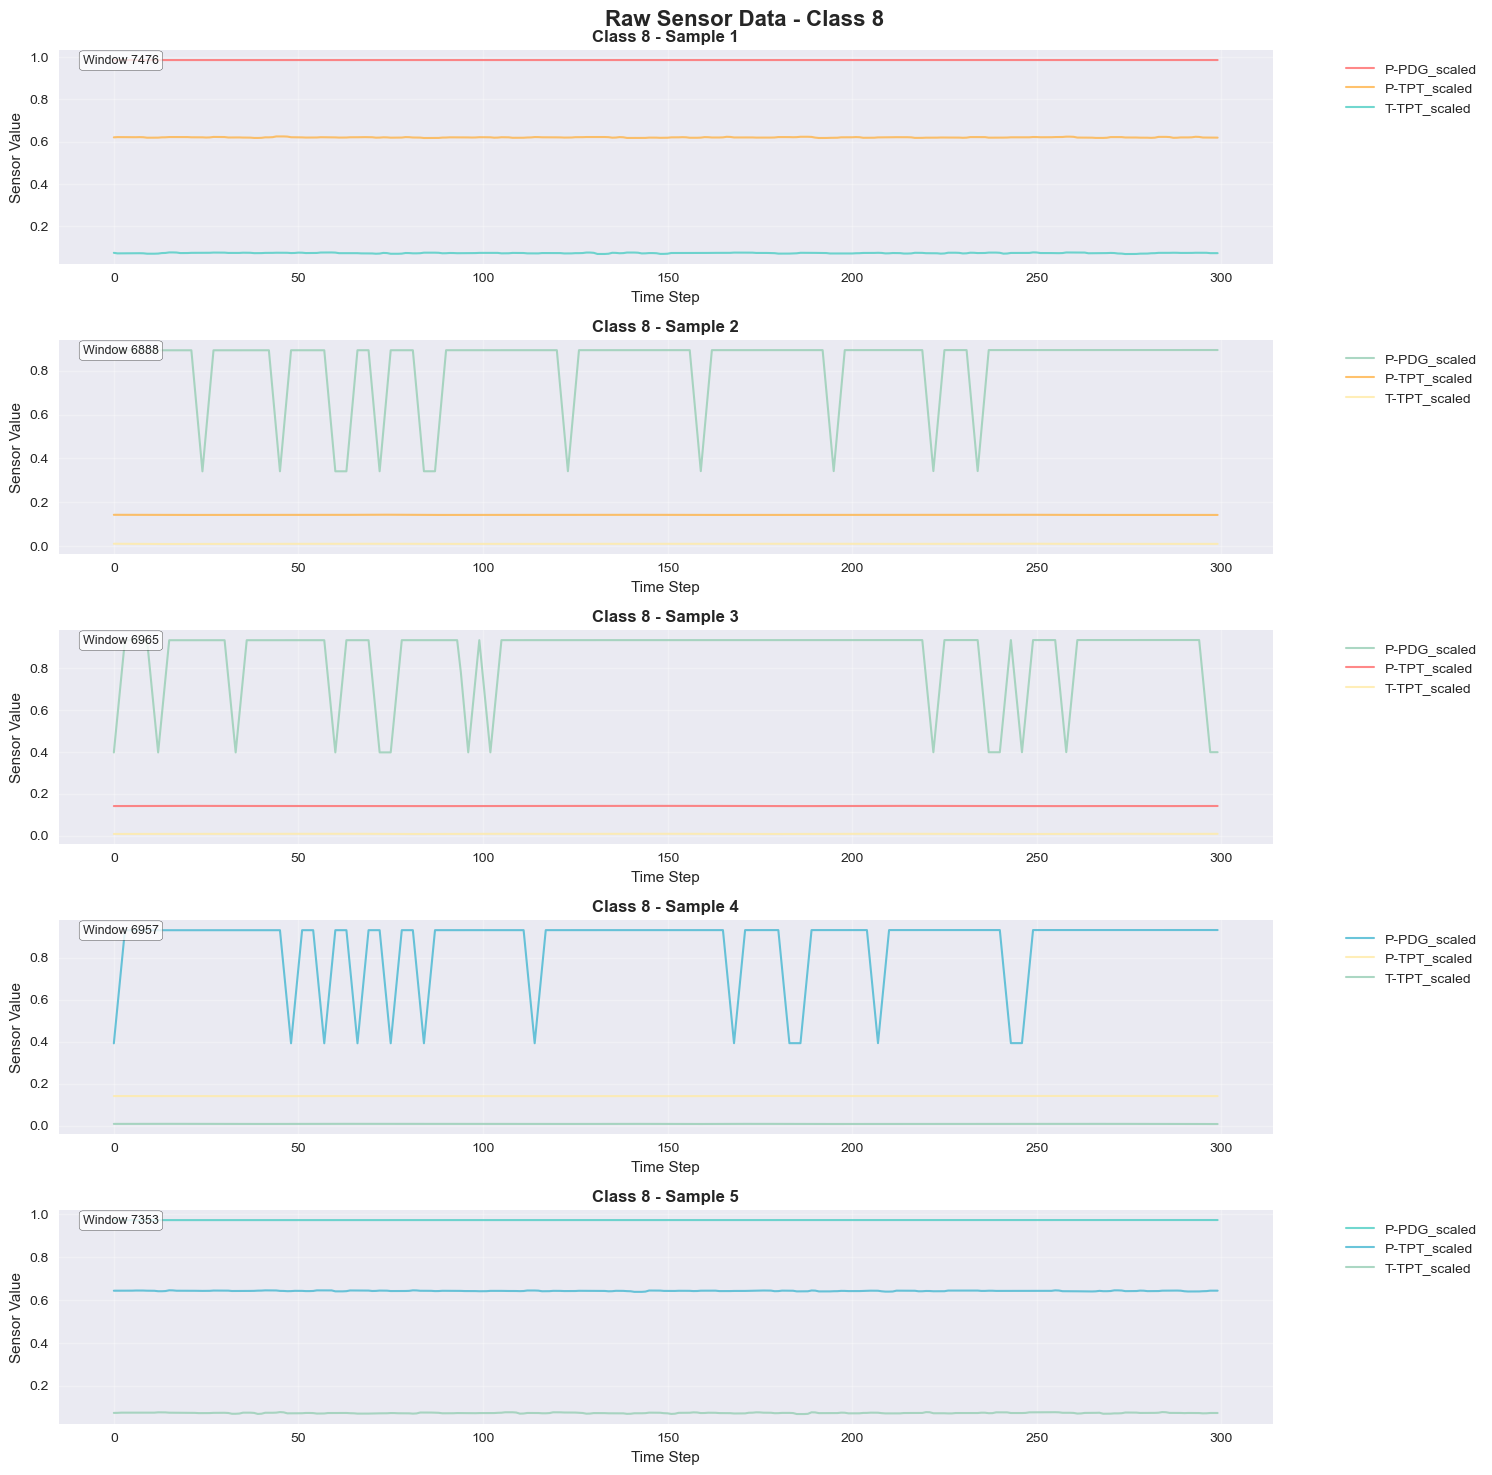

   ✅ Displayed 5 samples for class 8

🎯 Class 9:
   📊 Showing 5 samples (out of 89 available)


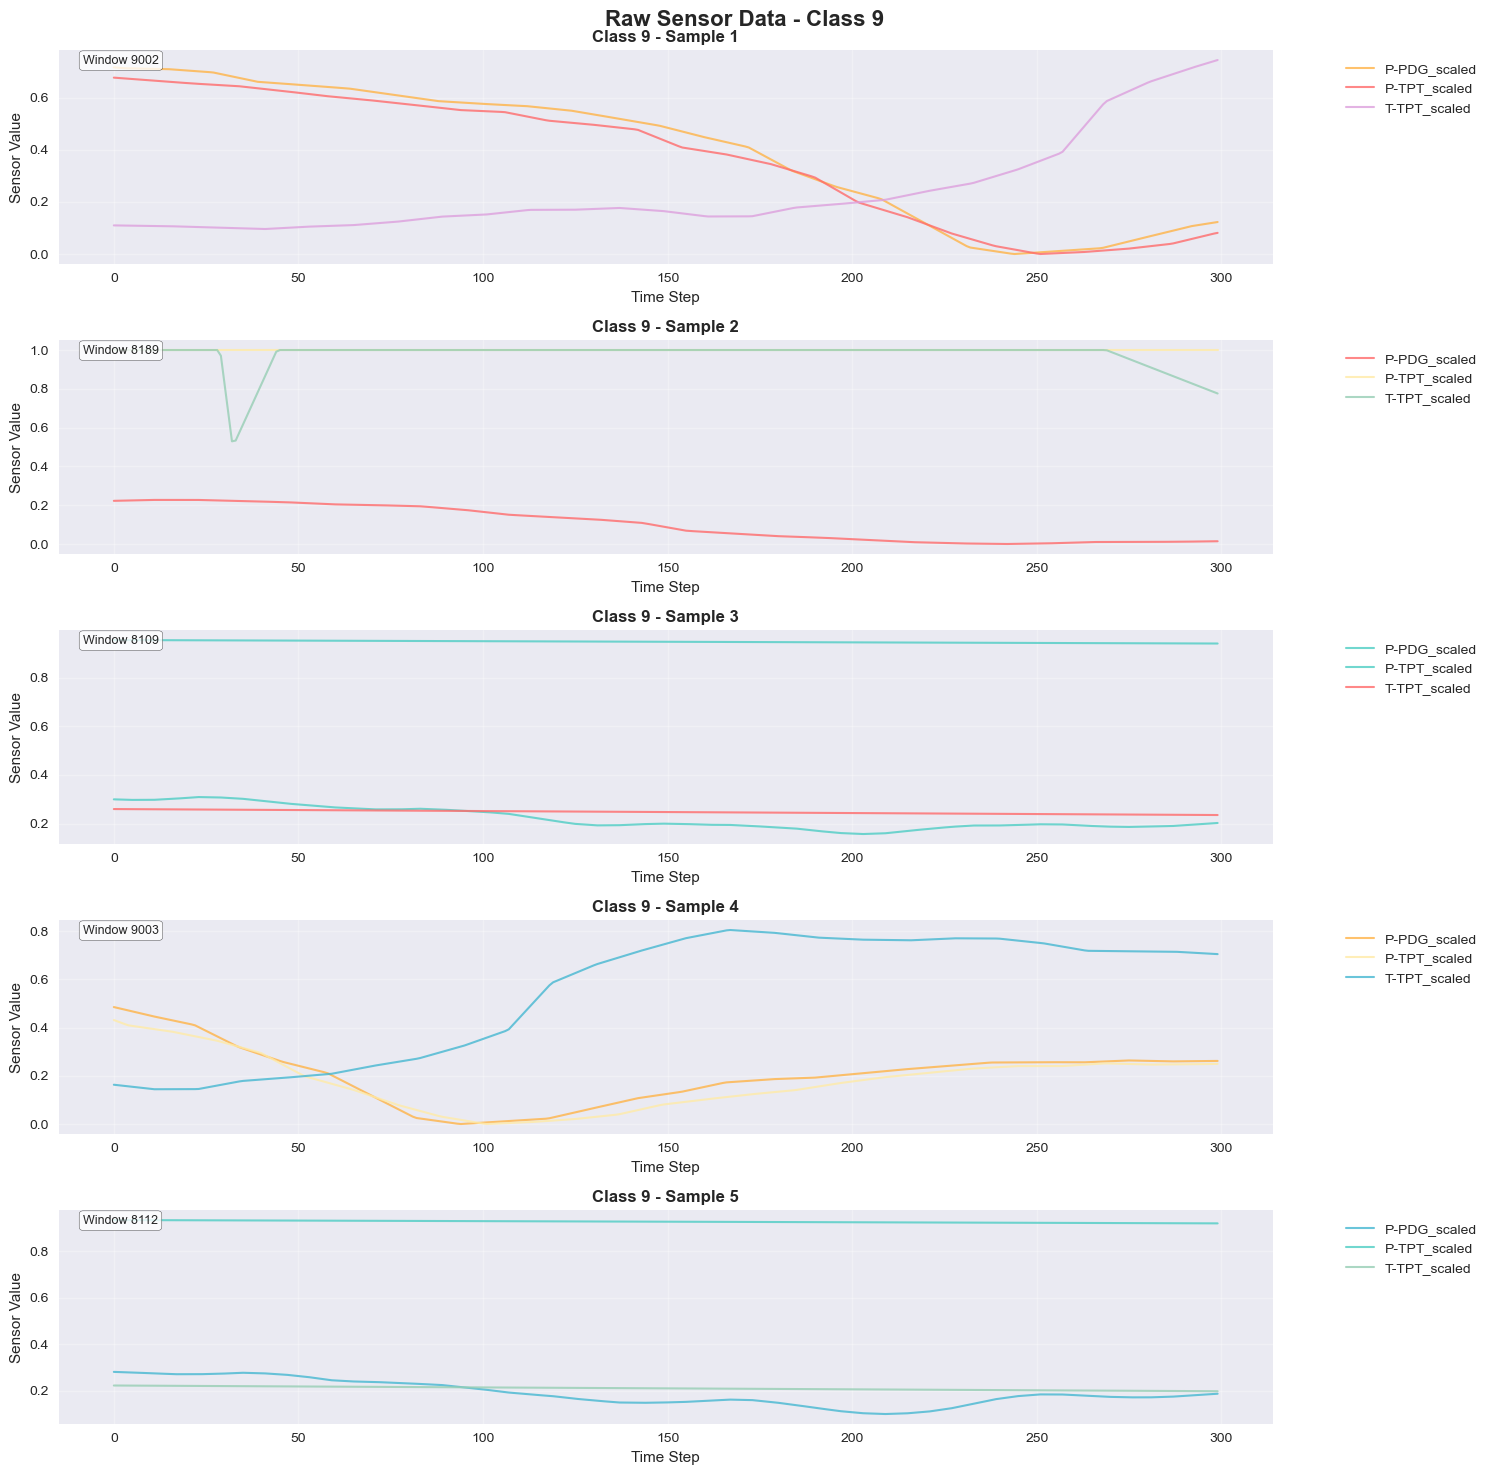

   ✅ Displayed 5 samples for class 9

✅ Raw visualization complete for all 10 classes!

📊 Raw visualization provides insights into:
   • Temporal patterns within each class
   • Sensor behavior and correlations
   • Data quality and anomalies
   • Class-specific characteristics


In [3]:
# Raw Visualization: Sample Sensor Data for Each Class
if test_dfs is not None and 'test_classes' in locals():
    print("🎨 Raw Sensor Data Visualization")
    print("=" * 60)
    
    try:
        # Extract and map class labels first
        mapped_classes = dim_reducer.extract_and_map_classes(test_dfs, test_classes)
        
        # Set random seed for reproducible sampling
        np.random.seed(42)
        
        # Visualize raw samples for each class (5 samples per class)
        dim_reducer.visualize_raw_samples(test_dfs, mapped_classes, samples_per_class=5)
        
        print(f"\n📊 Raw visualization provides insights into:")
        print(f"   • Temporal patterns within each class")
        print(f"   • Sensor behavior and correlations")
        print(f"   • Data quality and anomalies")
        print(f"   • Class-specific characteristics")
        
    except Exception as e:
        print(f"❌ Raw visualization failed: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Cannot create raw visualizations: No test data available")
    print("Please ensure the data loading completed successfully")

In [4]:
# Data Preprocessing for Visualization
print("🔧 Preparing Data for Dimensionality Reduction")
print("=" * 60)

# Validate data availability
if 'test_dfs' not in locals() or test_dfs is None or len(test_dfs) == 0:
    print("❌ No test data available. Please run the previous cell first.")
    X_scaled, y_labels = None, None
else:
    try:
        # Import visualization libraries
        print("📦 Loading visualization libraries...", end=" ")
        import matplotlib.pyplot as plt
        import seaborn as sns
        from sklearn.preprocessing import StandardScaler
        from sklearn.manifold import TSNE
        import warnings
        warnings.filterwarnings("ignore")
        print("✅")

        # Check for UMAP availability
        try:
            import umap
            print("✅ UMAP available")
        except ImportError:
            print("⚠️ UMAP not available (install with: pip install umap-learn)")
            umap = None

        print(f"🪟 Processing {len(test_dfs)} windows for visualization...")

    except Exception as e:
        print(f"❌ Library import failed: {e}")
        X_scaled, y_labels = None, None

🔧 Preparing Data for Dimensionality Reduction
📦 Loading visualization libraries... ✅
✅ UMAP available
🪟 Processing 10217 windows for visualization...
✅ UMAP available
🪟 Processing 10217 windows for visualization...


In [5]:
# Extract and Process Class Labels
if test_dfs is not None:
    try:
        # Extract and map class labels using existing methods
        mapped_classes = dim_reducer.extract_and_map_classes(test_dfs, test_classes)
        print("✅ Class processing complete")
        
    except Exception as e:
        print(f"❌ Class processing failed: {e}")
        mapped_classes = None

🏷️ Processing class labels...
🏷️ Original class distribution: {np.int16(0): np.int64(5025), np.int16(1): np.int64(340), np.int16(2): np.int64(7), np.int16(3): np.int64(242), np.int16(4): np.int64(592), np.int16(5): np.int64(2), np.int16(6): np.int64(9), np.int16(7): np.int64(34), np.int16(8): np.int64(62), np.int16(101): np.int64(865), np.int16(102): np.int64(35), np.int16(105): np.int64(57), np.int16(106): np.int64(4), np.int16(107): np.int64(1712), np.int16(108): np.int64(1142), np.int16(109): np.int64(89)}
🔄 Mapped 3904 transient classes
🏷️ Mapped class distribution: {np.int64(0): np.int64(5025), np.int64(1): np.int64(1205), np.int64(2): np.int64(42), np.int64(3): np.int64(242), np.int64(4): np.int64(592), np.int64(5): np.int64(59), np.int64(6): np.int64(13), np.int64(7): np.int64(1746), np.int64(8): np.int64(1204), np.int64(9): np.int64(89)}
✅ Class processing complete


In [6]:
# Intelligent Sampling and Feature Extraction
if mapped_classes is not None:
    try:
        # Perform intelligent sampling using existing methods
        selected_test_dfs, selected_classes, sampling_summary = dim_reducer.intelligent_sampling_for_visualization(
            test_dfs, mapped_classes, config
        )
        
        # Extract and standardize features
        X_scaled, y_labels, scaler = dim_reducer.prepare_features_for_visualization(
            selected_test_dfs, selected_classes
        )
        
        print(f"\n📈 Final Dataset Summary:")
        print(f"   • Samples: {X_scaled.shape[0]} (balanced)")
        print(f"   • Features: {X_scaled.shape[1]} (standardized)")
        print(f"   • Classes: {sorted(np.unique(y_labels))}")
        print(f"   • Memory: {X_scaled.nbytes / 1024 / 1024:.2f} MB")
        
        unique_classes = np.unique(y_labels)
        print("✅ Data preparation complete - ready for visualization!")
        
    except Exception as e:
        print(f"❌ Feature extraction failed: {e}")
        X_scaled, y_labels = None, None
        import traceback
        traceback.print_exc()
else:
    X_scaled, y_labels = None, None

🎯 Performing intelligent sampling...
   • Selected 501 windows
   • Sampling summary: {1: {'available': 1205, 'sampled': 100}, 2: {'available': 42, 'sampled': 42}, 3: {'available': 242, 'sampled': 100}, 4: {'available': 592, 'sampled': 100}, 5: {'available': 59, 'sampled': 59}, 8: {'available': 1204, 'sampled': 100}}
🔄 Preparing features for visualization...
   • Features: 3 sensors × 300 timesteps
   • Feature matrix: (501, 900)
   • Memory usage: 3.44 MB

📈 Final Dataset Summary:
   • Samples: 501 (balanced)
   • Features: 900 (standardized)
   • Classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8)]
   • Memory: 3.44 MB
✅ Data preparation complete - ready for visualization!
   • Feature matrix: (501, 900)
   • Memory usage: 3.44 MB

📈 Final Dataset Summary:
   • Samples: 501 (balanced)
   • Features: 900 (standardized)
   • Classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8)]
   • Memory: 3.44 MB
✅ Data preparation 

## Dimensionality Reduction Analysis

Apply t-SNE and UMAP to visualize high-dimensional time series data in 2D space.

**Methods:**
- **t-SNE**: Preserves local structure, good for cluster visualization
- **UMAP**: Preserves global structure, faster computation
- **Multiple configurations**: Test different parameters for optimal results

🔮 t-SNE: Non-linear Dimensionality Reduction
🔮 Running t-SNE analysis...
   • t-SNE #1: perplexity=30, lr=200...
     ✅ Completed in 5.9s
   • t-SNE #2: perplexity=10, lr=100...
     ✅ Completed in 5.9s
   • t-SNE #2: perplexity=10, lr=100...
     ✅ Completed in 0.5s
   • t-SNE #3: perplexity=50, lr=300...
     ✅ Completed in 0.5s
   • t-SNE #3: perplexity=50, lr=300...
     ✅ Completed in 0.7s
   • t-SNE #4: perplexity=30, lr=500...
     ✅ Completed in 0.7s
   • t-SNE #4: perplexity=30, lr=500...
     ✅ Completed in 0.6s
     ✅ Completed in 0.6s


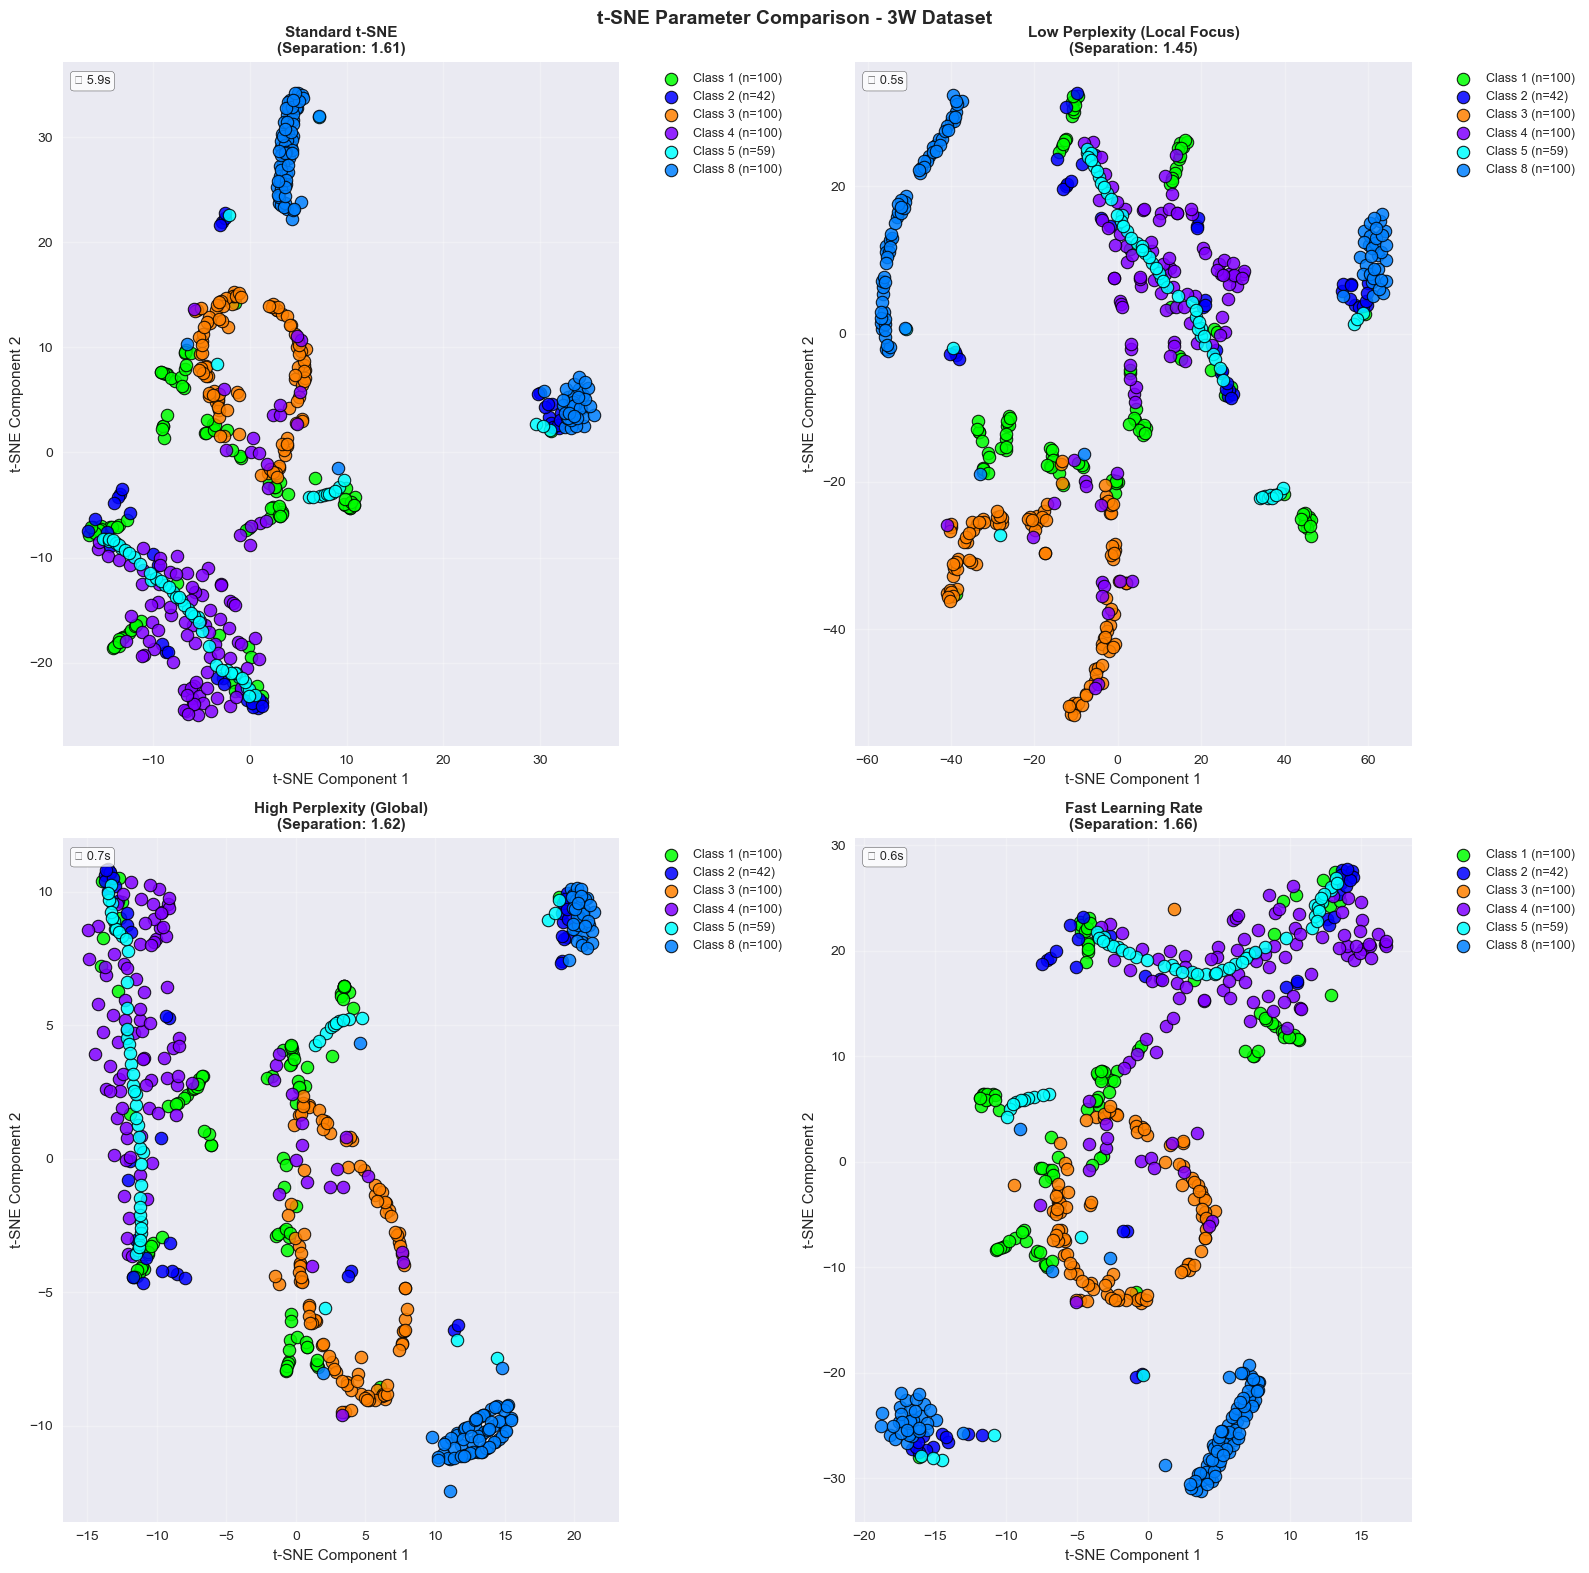


📊 t-SNE Analysis Results:
⚡ Configuration Performance:
   • Config 1: 5.9s
   • Config 2: 0.5s ⚡ Fastest
   • Config 3: 0.7s
   • Config 4: 0.6s


In [7]:
# t-SNE Visualization Analysis
if X_scaled is not None and y_labels is not None:
    print("🔮 t-SNE: Non-linear Dimensionality Reduction")
    print("=" * 60)
    
    # Run t-SNE analysis using existing methods
    tsne_results = dim_reducer.run_tsne_analysis(X_scaled, y_labels)
    
    # Create visualizations
    fig = dim_reducer.plot_dimensionality_reduction_results(tsne_results, y_labels, "t-SNE")
    
    # Print performance summary
    dim_reducer.print_dimensionality_reduction_summary(tsne_results, "t-SNE")
    
else:
    print("❌ Cannot run t-SNE: No processed data available")
    print("Please ensure the data preparation completed successfully")

In [8]:
# Check UMAP Availability
try:
    import umap
    umap_available = True
    print("✅ UMAP library available")
except ImportError:
    umap_available = False
    print("❌ UMAP not available")
    print("📦 Install with: pip install umap-learn")
    print("🔄 Attempting installation...")
    
    try:
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "umap-learn"], 
                             capture_output=True, text=True)
        import umap
        umap_available = True
        print("✅ UMAP installed successfully")
    except Exception as e:
        print(f"❌ Installation failed: {e}")
        print("⚠️ Continuing without UMAP")

✅ UMAP library available


🚀 UMAP: Uniform Manifold Approximation
🚀 Running UMAP analysis...
   • UMAP #1: neighbors=15, dist=0.1...
     ✅ Completed in 6.4s
   • UMAP #2: neighbors=5, dist=0.0...
     ✅ Completed in 6.4s
   • UMAP #2: neighbors=5, dist=0.0...
     ✅ Completed in 0.2s
   • UMAP #3: neighbors=50, dist=0.5...
     ✅ Completed in 0.2s
   • UMAP #3: neighbors=50, dist=0.5...
     ✅ Completed in 0.5s
   • UMAP #4: neighbors=30, dist=0.25...
     ✅ Completed in 0.5s
   • UMAP #4: neighbors=30, dist=0.25...
     ✅ Completed in 0.4s
     ✅ Completed in 0.4s


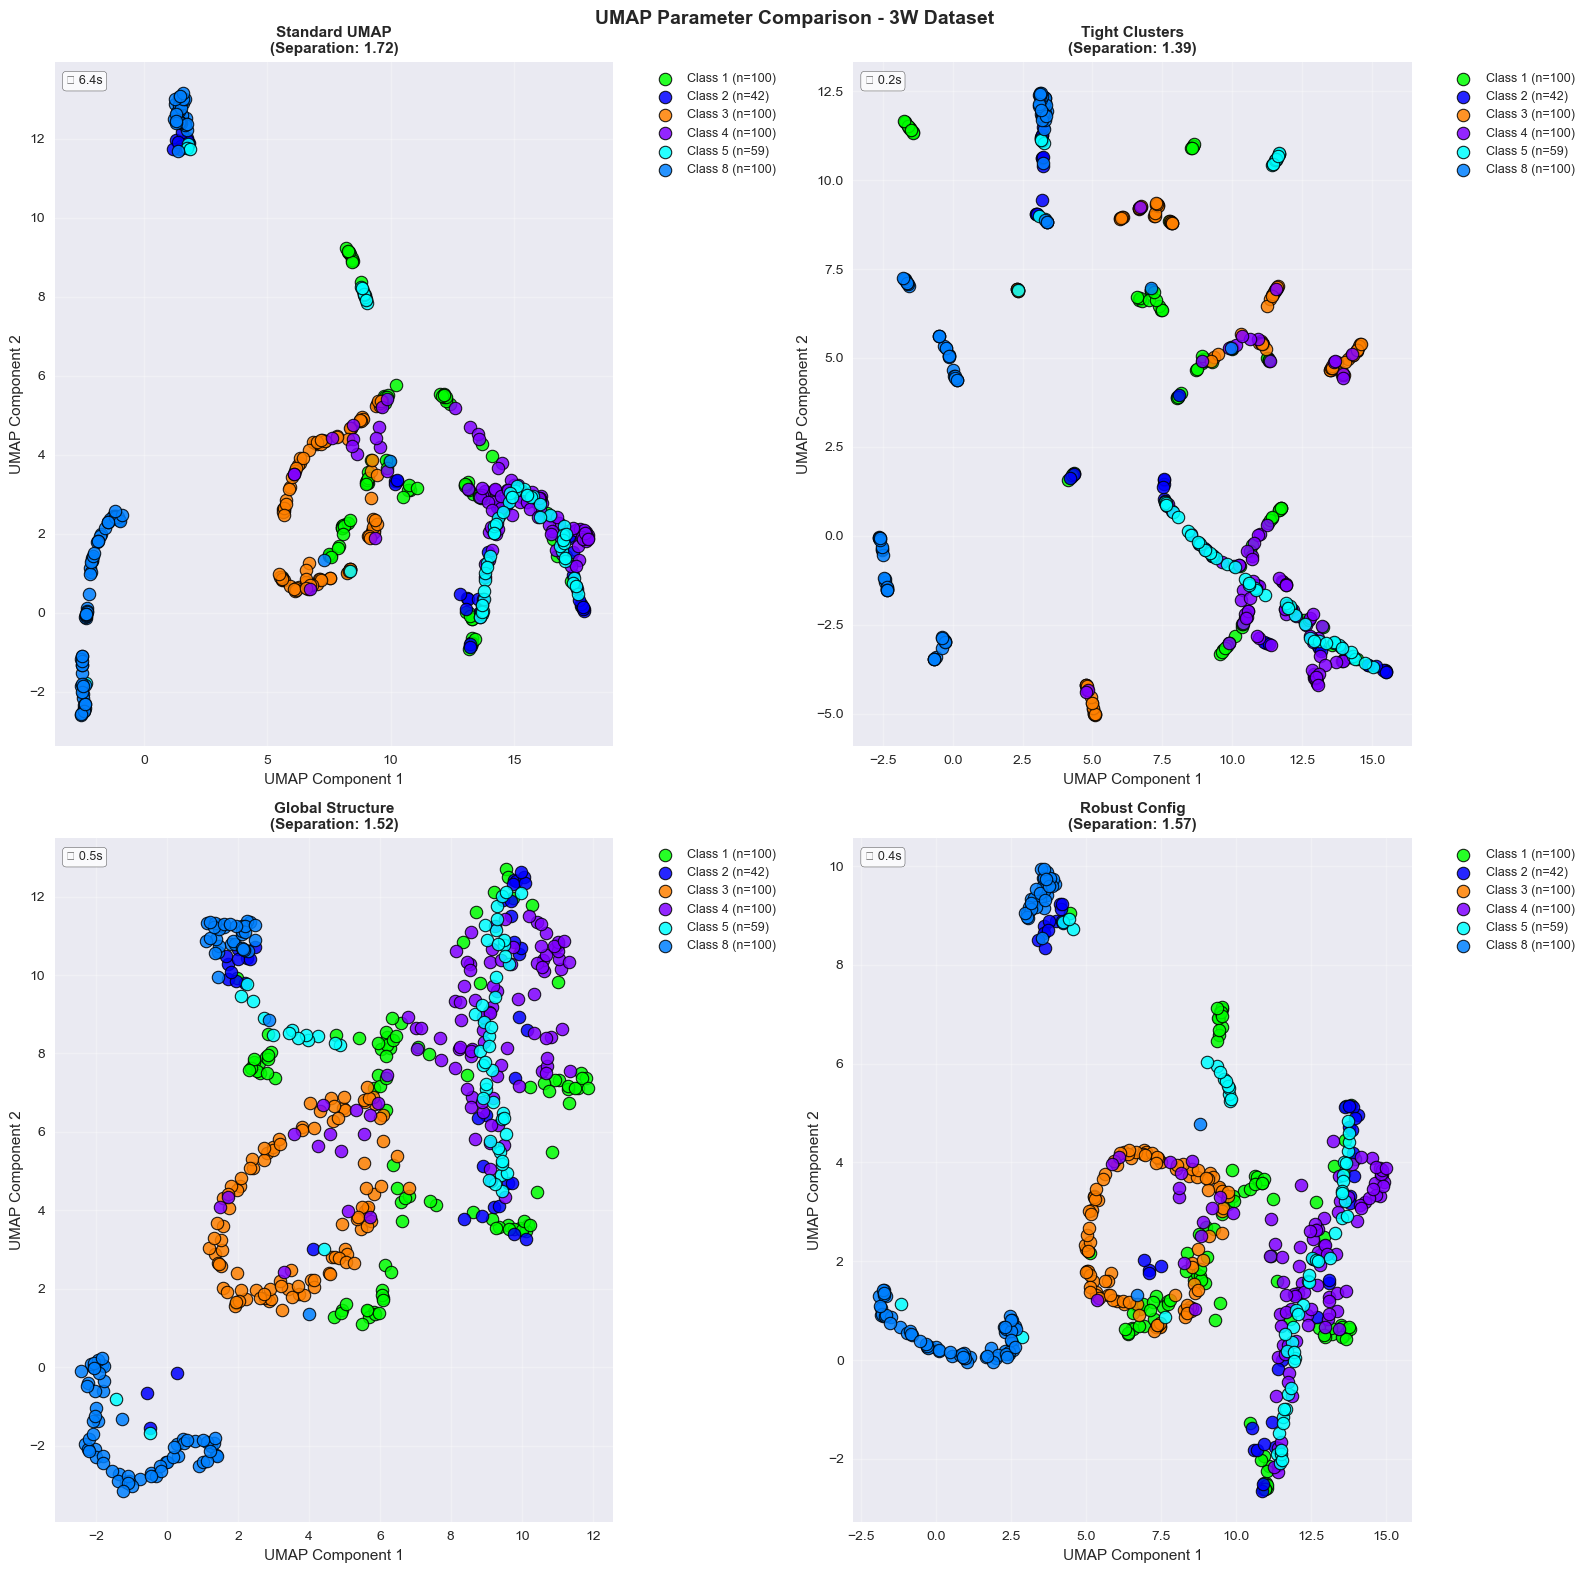


📊 UMAP Analysis Results:
⚡ Configuration Performance:
   • Config 1: 6.4s
   • Config 2: 0.2s ⚡ Fastest
   • Config 3: 0.5s
   • Config 4: 0.4s


In [9]:
# UMAP Visualization Analysis
if X_scaled is not None and y_labels is not None and umap_available:
    print("🚀 UMAP: Uniform Manifold Approximation")
    print("=" * 60)
    
    # Run UMAP analysis using existing methods
    umap_results = dim_reducer.run_umap_analysis(X_scaled, y_labels)
    
    if umap_results:
        # Create visualizations
        fig = dim_reducer.plot_dimensionality_reduction_results(umap_results, y_labels, "UMAP")
        
        # Print performance summary
        dim_reducer.print_dimensionality_reduction_summary(umap_results, "UMAP")
    
elif not umap_available:
    print("❌ UMAP not available. Skipping UMAP analysis.")
else:
    print("❌ Cannot run UMAP: No processed data available")

In [10]:
# Method Comparison and Analysis
print("📊 Dimensionality Reduction Method Comparison")
print("=" * 60)

# Compare methods if both are available
if 'tsne_results' in locals() and 'umap_results' in locals():
    print("🏆 t-SNE vs UMAP Performance Comparison:")
    
    # Calculate average times
    tsne_times = [r['time'] for r in tsne_results if r['time'] is not None]
    umap_times = [r['time'] for r in umap_results if r['time'] is not None] if umap_results else []
    
    if tsne_times:
        avg_tsne_time = np.mean(tsne_times)
        print(f"   • t-SNE average time: {avg_tsne_time:.1f}s")
    
    if umap_times:
        avg_umap_time = np.mean(umap_times)
        print(f"   • UMAP average time: {avg_umap_time:.1f}s")
        
        if tsne_times:
            speedup = avg_tsne_time / avg_umap_time
            print(f"   • UMAP speedup: {speedup:.1f}x faster")

    print(f"\n📈 Method Characteristics:")
    print(f"   🔮 t-SNE:")
    print(f"      • Excellent for local structure preservation")
    print(f"      • Great for cluster visualization")
    print(f"      • Sensitive to perplexity parameter")
    print(f"      • Computationally intensive")
    
    if umap_available:
        print(f"   🚀 UMAP:")
        print(f"      • Preserves both local and global structure")
        print(f"      • Faster computation")
        print(f"      • More scalable to large datasets")
        print(f"      • Deterministic results")

print(f"\n✅ Visualization analysis complete!")
print(f"📝 Key insights:")
print(f"   • Both methods revealed class separability patterns")
print(f"   • Parameter tuning affects cluster quality")
print(f"   • Different metrics capture different data aspects")

📊 Dimensionality Reduction Method Comparison
🏆 t-SNE vs UMAP Performance Comparison:
   • t-SNE average time: 2.0s
   • UMAP average time: 1.9s
   • UMAP speedup: 1.0x faster

📈 Method Characteristics:
   🔮 t-SNE:
      • Excellent for local structure preservation
      • Great for cluster visualization
      • Sensitive to perplexity parameter
      • Computationally intensive
   🚀 UMAP:
      • Preserves both local and global structure
      • Faster computation
      • More scalable to large datasets
      • Deterministic results

✅ Visualization analysis complete!
📝 Key insights:
   • Both methods revealed class separability patterns
   • Parameter tuning affects cluster quality
   • Different metrics capture different data aspects


In [11]:
# Summary and Next Steps
print("🎯 Visualization Analysis Summary")
print("=" * 60)

if 'X_scaled' in locals() and X_scaled is not None:
    print(f"✅ Successfully analyzed {X_scaled.shape[0]} windowed time series samples")
    print(f"✅ Reduced dimensionality from {X_scaled.shape[1]} to 2D")
    print(f"✅ Visualized {len(np.unique(y_labels))} fault classes")
    
    # Dataset summary
    print(f"\n📊 Dataset Summary:")
    for class_label in sorted(np.unique(y_labels)):
        count = np.sum(y_labels == class_label)
        percentage = count / len(y_labels) * 100
        print(f"   • Class {class_label}: {count} samples ({percentage:.1f}%)")
    
    # Available variables
    print(f"\n💾 Available Variables:")
    print(f"   • X_scaled: Standardized feature matrix ({X_scaled.shape})")
    print(f"   • y_labels: Class labels ({len(y_labels)} samples)")
    if 'tsne_results' in locals():
        print(f"   • tsne_results: t-SNE analysis results")
    if 'umap_results' in locals() and umap_results:
        print(f"   • umap_results: UMAP analysis results")
    

else:
    print("❌ Analysis incomplete - no processed data available")
    print("🔧 Please run previous cells to generate data")

🎯 Visualization Analysis Summary
✅ Successfully analyzed 501 windowed time series samples
✅ Reduced dimensionality from 900 to 2D
✅ Visualized 6 fault classes

📊 Dataset Summary:
   • Class 1: 100 samples (20.0%)
   • Class 2: 42 samples (8.4%)
   • Class 3: 100 samples (20.0%)
   • Class 4: 100 samples (20.0%)
   • Class 5: 59 samples (11.8%)
   • Class 8: 100 samples (20.0%)

💾 Available Variables:
   • X_scaled: Standardized feature matrix ((501, 900))
   • y_labels: Class labels (501 samples)
   • tsne_results: t-SNE analysis results
   • umap_results: UMAP analysis results
